# Crunchbase Analysis

### Import Important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

### Loading the datasets into pandas dataframe

In [2]:
df_acq = pd.read_csv("acquisitions.csv")
df_degree = pd.read_csv("degrees.csv")
df_funding = pd.read_csv("funding_rounds.csv")
df_fund = pd.read_csv("funds.csv")
df_inves = pd.read_csv("investments.csv")
df_ipos = pd.read_csv("ipos.csv")
df_mile = pd.read_csv("milestones.csv")
df_obj = pd.read_csv("objects.csv")
df_office = pd.read_csv("offices.csv")
df_people = pd.read_csv("people.csv")
df_rel = pd.read_csv("relationships.csv")
df_country = pd.read_csv("countries.csv")

## Exploring the dataset

### Acquisition details

In [3]:
# check the first five entries of acquisition dataframe
df_acq .head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


In [4]:
# check the number of rows and column
df_acq.shape

(9562, 12)

Observation: The dataset has 9562 rows and 12 columns

In [5]:
# check the general information of the dataset
df_acq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 12 columns):
id                     9562 non-null int64
acquisition_id         9562 non-null int64
acquiring_object_id    9562 non-null object
acquired_object_id     9561 non-null object
term_code              1906 non-null object
price_amount           9562 non-null float64
price_currency_code    9558 non-null object
acquired_at            9533 non-null object
source_url             8566 non-null object
source_description     8590 non-null object
created_at             9562 non-null object
updated_at             9562 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 896.5+ KB


In [6]:
# check the sum of null values
df_acq.isnull().sum()

id                        0
acquisition_id            0
acquiring_object_id       0
acquired_object_id        1
term_code              7656
price_amount              0
price_currency_code       4
acquired_at              29
source_url              996
source_description      972
created_at                0
updated_at                0
dtype: int64

In [7]:
df_acq.isnull().sum()/len(df_acq) * 100

id                      0.000000
acquisition_id          0.000000
acquiring_object_id     0.000000
acquired_object_id      0.010458
term_code              80.066932
price_amount            0.000000
price_currency_code     0.041832
acquired_at             0.303284
source_url             10.416231
source_description     10.165237
created_at              0.000000
updated_at              0.000000
dtype: float64

In [8]:
# check for duplicate value
df_acq.duplicated().sum()

0

In [9]:
df_acq.describe()

,id,acquisition_id,price_amount
count,9562.000000,9562.000000,9.562000e+03
mean,4781.500000,5266.795859,3.886191e+08
std,2760.455971,3009.738380,2.660374e+10
min,1.000000,1.000000,0.000000e+00
25%,2391.250000,2692.250000,0.000000e+00
50%,4781.500000,5197.500000,0.000000e+00
75%,7171.750000,7858.750000,5.000000e+05
max,9562.000000,10529.000000,2.600000e+12


In [10]:
# choose the important features in the dataset and check the first five rows
final_acq = df_acq[["id",
                   "acquisition_id",
                   "acquiring_object_id",
                   "acquired_object_id",
                   "term_code",
                   "price_amount",
                   "price_currency_code"]]
final_acq.head()

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code
0,1,1,c:11,c:10,NaN,20000000.0,USD
1,2,7,c:59,c:72,cash,60000000.0,USD
2,3,8,c:24,c:132,cash,280000000.0,USD
3,4,9,c:59,c:155,cash,100000000.0,USD
4,5,10,c:212,c:215,cash,25000000.0,USD


In [11]:
# to know the unique value in term_code
df_acq['term_code'].unique()

array([nan, 'cash', 'stock', 'cash_and_stock'], dtype=object)

In [12]:
# to know the number of value in each term_code
term_count = final_acq['term_code'].value_counts()
term_count

cash              1240
cash_and_stock     448
stock              218
Name: term_code, dtype: int64

Observation: Cash is the term code with the highest distribution of 1240 followed by cash and stock while stock is the least

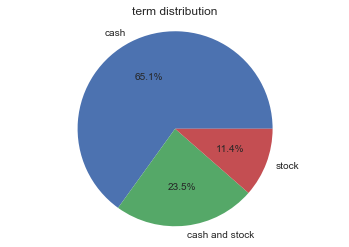

In [13]:
# distribution of term code using pie chart
term_count= [1240,448,218]
my_labels = 'cash','cash and stock','stock'
plt.pie(term_count,labels=my_labels,autopct='%1.1f%%')
plt.title('term distribution')
plt.axis('equal')
plt.show();

In [14]:
# to know the total amount of term code
term_distribution= final_acq.groupby('term_code')['price_amount'].sum()
term_distribution

term_code
cash              2.914340e+11
cash_and_stock    9.862917e+10
stock             9.332581e+10
Name: price_amount, dtype: float64

In [15]:
# to know the mean amount of term code
term_distribution= final_acq.groupby('term_code')['price_amount'].mean()
term_distribution

term_code
cash              2.350274e+08
cash_and_stock    2.201544e+08
stock             4.281000e+08
Name: price_amount, dtype: float64

### Degree details

In [16]:
# check the first five entries of acquisition dataframe
df_degree.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [17]:
#choose the important column
final_degree = df_degree[["id",
                           "object_id",
                           "degree_type",
                           "subject",
                           "institution",
                           "graduated_at"]]
final_degree.head()

,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaN
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN


In [18]:
# check the number of rows and columns of our new table
final_degree.shape

(109610, 6)

Observation: degree table now has 109610 rows and 6 columns

In [19]:
# Top 5 institutions
top_5_institutions = final_degree['institution'].value_counts().sort_values(ascending =False)[0:5]
top_5_institutions

Stanford University                   2990
Harvard Business School               1899
Harvard University                    1581
University of California, Berkeley    1476
Cornell University                    1042
Name: institution, dtype: int64

**Observation: Stanford University top the list of the Insitution followed by harvard business school and harvard university**

In [20]:
# change our graduated_at to a date_time format
final_degree['graduated_at'] = pd.to_datetime(final_degree["graduated_at"],infer_datetime_format = True)


In [21]:
final_degree.head()

,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaT
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaT


In [22]:
final_degree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 6 columns):
id              109610 non-null int64
object_id       109610 non-null object
degree_type     98395 non-null object
subject         81298 non-null object
institution     109555 non-null object
graduated_at    58054 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 5.0+ MB


In [23]:
# top 10 degree
top_10_degree = final_degree['degree_type'].value_counts().sort_values(ascending =False)[0:10]
top_10_degree

BS        23425
BA        15342
MBA       15342
MS        11715
PhD        4056
JD         1997
MA         1693
Degree     1692
BBA        1670
BE         1353
Name: degree_type, dtype: int64

**Observation: BS is the degree with the highest frequency followed by BA.**

### Funding_round details

In [24]:
# check the first five entries of acquisition dataframe
df_funding.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


In [25]:
# check all the column in the dataset
df_funding.columns

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [26]:
df_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 23 columns):
id                          52928 non-null int64
funding_round_id            52928 non-null int64
object_id                   52928 non-null object
funded_at                   52680 non-null object
funding_round_type          52928 non-null object
funding_round_code          52928 non-null object
raised_amount_usd           52928 non-null float64
raised_amount               52928 non-null float64
raised_currency_code        49862 non-null object
pre_money_valuation_usd     52928 non-null float64
pre_money_valuation         52928 non-null float64
pre_money_currency_code     26883 non-null object
post_money_valuation_usd    52928 non-null float64
post_money_valuation        52928 non-null float64
post_money_currency_code    30448 non-null object
participants                52928 non-null int64
is_first_round              52928 non-null int64
is_last_round               52928 non-n

In [27]:
df_funding.isnull().sum()/len(df_funding) * 100

id                           0.000000
funding_round_id             0.000000
object_id                    0.000000
funded_at                    0.468561
funding_round_type           0.000000
funding_round_code           0.000000
raised_amount_usd            0.000000
raised_amount                0.000000
raised_currency_code         5.792775
pre_money_valuation_usd      0.000000
pre_money_valuation          0.000000
pre_money_currency_code     49.208359
post_money_valuation_usd     0.000000
post_money_valuation         0.000000
post_money_currency_code    42.472793
participants                 0.000000
is_first_round               0.000000
is_last_round                0.000000
source_url                  23.703900
source_description          17.928129
created_by                   8.760958
created_at                   0.000000
updated_at                   0.000000
dtype: float64

In [28]:
# drop the column that is not needed
final_funding = df_funding.drop(['is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'], axis=1)

In [29]:
# checking if there are outliers
final_funding.describe()

,id,funding_round_id,raised_amount_usd,raised_amount,pre_money_valuation_usd,pre_money_valuation,post_money_valuation_usd,post_money_valuation,participants
count,52928.000000,52928.000000,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,5.292800e+04,52928.000000
mean,28962.894536,28962.894536,7.946092e+06,8.056120e+06,3.294525e+05,3.294525e+05,1.824359e+06,1.862279e+06,1.528567
std,16821.871803,16821.871803,4.216820e+07,4.479914e+07,6.531803e+07,6.531803e+07,1.287065e+08,1.287686e+08,2.060192
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,14343.750000,14343.750000,2.463300e+05,2.500000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,28885.500000,28885.500000,1.600000e+06,1.565056e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,43561.250000,43561.250000,6.700000e+06,6.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000
max,57952.000000,57952.000000,3.835050e+09,3.835050e+09,1.500000e+10,1.500000e+10,2.432423e+10,2.432423e+10,36.000000


In [30]:
final_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 16 columns):
id                          52928 non-null int64
funding_round_id            52928 non-null int64
object_id                   52928 non-null object
funded_at                   52680 non-null object
funding_round_type          52928 non-null object
funding_round_code          52928 non-null object
raised_amount_usd           52928 non-null float64
raised_amount               52928 non-null float64
raised_currency_code        49862 non-null object
pre_money_valuation_usd     52928 non-null float64
pre_money_valuation         52928 non-null float64
pre_money_currency_code     26883 non-null object
post_money_valuation_usd    52928 non-null float64
post_money_valuation        52928 non-null float64
post_money_currency_code    30448 non-null object
participants                52928 non-null int64
dtypes: float64(6), int64(3), object(7)
memory usage: 6.5+ MB


In [31]:
# to know the counts of funding round type
round_type = final_funding['funding_round_type'].value_counts()
round_type

venture           15342
angel             13163
series-a           9873
series-b           4892
series-c+          4216
other              4201
private-equity     1043
crowdfunding        111
post-ipo             87
Name: funding_round_type, dtype: int64

**Venture has the highest count of 15342**

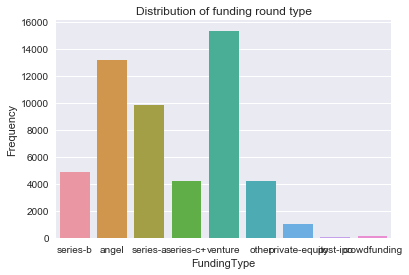

In [32]:
sns.countplot(data =final_funding, x = 'funding_round_type')
plt.xlabel('FundingType')
plt.ylabel('Frequency')
plt.title('Distribution of funding round type');

In [33]:
# sum of funding round type participants
funding_round_distribution= final_funding.groupby('funding_round_type')['participants'].sum()
funding_round_distribution

funding_round_type
angel             15611
crowdfunding         23
other              1444
post-ipo             49
private-equity      876
series-a          20232
series-b          12142
series-c+         13725
venture           16802
Name: participants, dtype: int64

**Observation:series-a has the highest sum of participants and crowdfunding has the least**

In [34]:
funding_round_distribution= final_funding.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending =False)
funding_round_distribution

funding_round_type
venture           1.251905e+11
series-c+         8.923834e+10
series-a          5.838949e+10
series-b          5.549725e+10
other             4.721534e+10
private-equity    2.609696e+10
post-ipo          1.473819e+10
angel             4.022867e+09
crowdfunding      1.818688e+08
Name: raised_amount_usd, dtype: float64

**Observation: Venture has the highest raised amount usd in the funding round type**

### Funds details

In [35]:
df_fund.head()

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


In [36]:
# to know the number of unique value in name column
df_fund['name'].nunique()

1313

In [37]:
df_fund.isnull().sum()

id                        0
fund_id                   0
object_id                 0
name                      0
funded_at               115
raised_amount             0
raised_currency_code      0
source_url              292
source_description      346
created_at                0
updated_at                0
dtype: int64

In [38]:
# check for duplicate value
df_fund.duplicated().sum()

0

In [39]:
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 11 columns):
id                      1564 non-null int64
fund_id                 1564 non-null int64
object_id               1564 non-null object
name                    1564 non-null object
funded_at               1449 non-null object
raised_amount           1564 non-null float64
raised_currency_code    1564 non-null object
source_url              1272 non-null object
source_description      1218 non-null object
created_at              1564 non-null object
updated_at              1564 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 134.5+ KB


In [40]:
# change our funded_at to a date_time format
df_fund['funded_at'] = pd.to_datetime(df_fund["funded_at"],infer_datetime_format = True)


In [41]:
# choose the important features in the dataset and check the first five rows
final_fund = df_fund[["id",
                   "fund_id",
                   "object_id",
                   "name",
                   "funded_at",
                   "raised_amount",
                   "raised_currency_code"]]
final_fund.head()

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD
3,6,6,f:192,New funds acquire,NaT,625000000.0,USD
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD


In [42]:
final_fund.shape

(1564, 7)

In [43]:
final_fund.describe()

,id,fund_id,raised_amount
count,1564.000000,1564.000000,1.564000e+03
mean,854.282609,854.282609,3.994813e+08
std,493.536295,493.536295,2.468491e+09
min,1.000000,1.000000,0.000000e+00
25%,427.750000,427.750000,1.630000e+07
50%,855.500000,855.500000,1.000000e+08
75%,1290.250000,1290.250000,2.750000e+08
max,1701.000000,1701.000000,8.900000e+10


In [44]:
# number of name
name_count = final_fund['name'].value_counts()
name_count

Fund I                                   61
Fund II                                  48
Fund III                                 37
Fund IV                                  17
Fund VI                                  14
Fund V                                   10
Fund VII                                  7
Fund 1                                    6
Fund IX                                   4
Second Fund                               4
Fund VIII                                 3
MDV VIII                                  3
Cleantech Fund                            3
Flybridge Capital Partners III            3
Debut Fund                                3
MDV IX                                    3
Venture Fund II                           3
Maiden Fund                               3
Bullet Time Ventures                      3
Special Opportunities Fund                2
venture fund                              2
Carlyle Peru Fund                         2
Harbert Venture Partners III    

In [45]:
# Top 5 names with highest raised amount
name_amount= final_fund.groupby('name')['raised_amount'].sum().sort_values(ascending =False)[0:5]
name_amount

name
Deric R. Mccloud                    8.900000e+10
Fund VI                             1.320500e+10
Fund VIII                           1.311300e+10
Carlyle Partners VI                 1.300000e+10
Warburg Pincus Private Equity XI    1.120000e+10
Name: raised_amount, dtype: float64

### Investment details

In [46]:
df_inves.head()

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


In [47]:
# choose the important features in the dataset and check the first five rows
final_inves = df_inves[["id",
                   "funding_round_id",
                   "funded_object_id",
                   "investor_object_id"]]
final_inves.head()

,id,funding_round_id,funded_object_id,investor_object_id
0,1,1,c:4,f:1
1,2,1,c:4,f:2
2,3,3,c:5,f:4
3,4,4,c:5,f:1
4,5,4,c:5,f:5


In [48]:
final_inves.shape

(80902, 4)

In [49]:
# checking the information of the table
final_inves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80902 entries, 0 to 80901
Data columns (total 4 columns):
id                    80902 non-null int64
funding_round_id      80902 non-null int64
funded_object_id      80902 non-null object
investor_object_id    80902 non-null object
dtypes: int64(2), object(2)
memory usage: 2.5+ MB


### Ipos details

In [50]:
df_ipos.head()

,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


In [51]:
df_ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 13 columns):
id                         1259 non-null int64
ipo_id                     1259 non-null int64
object_id                  1254 non-null object
valuation_amount           1259 non-null float64
valuation_currency_code    1257 non-null object
raised_amount              1259 non-null float64
raised_currency_code       699 non-null object
public_at                  659 non-null object
stock_symbol               1259 non-null object
source_url                 191 non-null object
source_description         180 non-null object
created_at                 1259 non-null object
updated_at                 1259 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 127.9+ KB


In [52]:
# number of null values
df_ipos.isnull().sum()

id                            0
ipo_id                        0
object_id                     5
valuation_amount              0
valuation_currency_code       2
raised_amount                 0
raised_currency_code        560
public_at                   600
stock_symbol                  0
source_url                 1068
source_description         1079
created_at                    0
updated_at                    0
dtype: int64

In [53]:
# drop the column that is not needed
final_ipos = df_ipos.drop(['source_url',
       'source_description', 'created_at', 'updated_at'], axis=1)

In [54]:
final_ipos.describe()

,id,ipo_id,valuation_amount,raised_amount
count,1259.000000,1259.000000,1.259000e+03,1.259000e+03
mean,630.000000,690.204925,3.607800e+08,5.887950e+07
std,363.586303,393.124176,5.173185e+09,8.708285e+08
min,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,315.500000,356.500000,0.000000e+00,0.000000e+00
50%,630.000000,688.000000,0.000000e+00,0.000000e+00
75%,944.500000,1025.500000,0.000000e+00,0.000000e+00
max,1259.000000,1376.000000,1.089600e+11,2.440000e+10


In [55]:
final_ipos['stock_symbol'].nunique()

1247

In [56]:
stock_count = final_ipos['stock_symbol'].value_counts()
stock_count

NASDAQ:OTEX     2
NASDAQ:WWVY     2
NYSE:ROK        2
NYSE:ABT        2
NASDAQ:RNWK     2
NYSE:GE         2
NASDAQ:RRD      2
NYSE:UPS        2
NYSE:ACT        2
NYSE:CMLP       2
ERTS            2
NASDAQ:CDW      2
Nasdaq: TSRX    1
NASDAQ:BRCM     1
NASDAQ:BSFT     1
UHR:VX          1
NASDAQ:LBAS     1
NASDAQ:EMKR     1
NASDAQ:SSNC     1
LCTC            1
NASDAQ:ANAC     1
NASDAQ:PTCT     1
OTC:TTNP        1
NASDAQ:INXI     1
NASDAQ:SCTY     1
NASDAQ:CMTL     1
EM              1
NASDAQ:QPACU    1
NASDAQ:TRMB     1
NASDAQ:SLAB     1
               ..
OTCBQ: MCVE     1
NASDAQ:PCCC     1
GRB             1
NASDAQ:ZRAN     1
TSX:NVA         1
NYSE:GEL        1
OTCBB:SYTE      1
NASDAQ:VSTM     1
NYSE:ISS        1
NASDAQ:MSII     1
NYSE:AME        1
OTC:FRFHF       1
NASDAQ:WIX      1
NYSE:TDC        1
NYSE:TYC        1
TSX.V: AMW      1
NASDAQ:SYMC     1
RMGN            1
NASDAQ:ALLT     1
NASDAQ:FTNT     1
NASDAQ:TQNT     1
NASDAQ:JTPY     1
NEPI            1
NASDAQ:ICEL     1
NASDAQ:ATV

In [57]:
stock_distribution= final_ipos.groupby('stock_symbol')['raised_amount'].sum().sort_values(ascending =False)
stock_distribution

stock_symbol
TSCO.L         2.440000e+10
NASDAQ:FB      1.840000e+10
NYSE:HLT       2.350000e+09
NYSE:TWTR      1.820000e+09
NYSE:AR        1.600000e+09
NASDAQ:HDS     1.330000e+09
NASDAQ:CDW     1.241850e+09
TYO:4776       1.100000e+09
NASDAQ:TSLA    1.000000e+09
NYSE:COTY      1.000000e+09
NYSE:EVHC      9.660000e+08
NYSE:VMW       9.570000e+08
NYSE:Q         9.470000e+08
NYSE:RENN      7.434000e+08
NYSE:ARMK      7.250000e+08
NASDAQ:CLWR    6.000000e+08
NASDAQ:COMM    5.770000e+08
NYSE:MEP       5.750000e+08
NYSE:LNKD      3.528000e+08
NASDAQ:PEGI    3.520000e+08
NYSE:ATHL      3.450000e+08
NYSE:CSTM      3.330000e+08
NYSE:KKR       3.050000e+08
NASDAQ:FEYE    3.040000e+08
NASDAQ:ZU      2.630000e+08
NYSE:VEEV      2.600000e+08
NYSE:BURL      2.600000e+08
NYSE:DATA      2.540000e+08
NASDAQ:EIGI    2.520000e+08
NASDAQ:CRTO    2.500000e+08
                   ...     
NYSE:CBZ       0.000000e+00
NYSE:CDI       0.000000e+00
NYSE:CFN       0.000000e+00
NYSE:CMLP      0.000000e+00
NYSE:CA

### Milestone details

In [58]:
df_mile.head()

,id,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,1,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-f...,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,2,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...,http://www.inquisitr.com/1103/seesmic-now-avai...,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,3,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,http://www.comscore.com/press/release.asp?pres...,11 Billion Videos Viewed Online in the U.S. in...,2008-06-18 08:50:24,2008-06-18 08:50:24
3,4,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,5,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53


In [59]:
df_mile['description'].nunique()

38537

In [60]:
df_mile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39456 entries, 0 to 39455
Data columns (total 9 columns):
id                    39456 non-null int64
object_id             39456 non-null object
milestone_at          39456 non-null object
milestone_code        39456 non-null object
description           39456 non-null object
source_url            31401 non-null object
source_description    29268 non-null object
created_at            39456 non-null object
updated_at            39456 non-null object
dtypes: int64(1), object(8)
memory usage: 2.7+ MB


In [61]:
# change our milestone_at to a date_time format
df_mile['milestone_at'] = pd.to_datetime(df_mile["milestone_at"],infer_datetime_format = True)

In [62]:
# choose the important features in the milestone dataset and check the first five rows
final_mile = df_mile[["id",
                   "object_id",
                   "milestone_at",
                   "milestone_code",
                   "description"]]
final_mile.head()

,id,object_id,milestone_at,milestone_code,description
0,1,c:12,2008-06-09,other,Survives iPhone 3G Stevenote
1,2,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...
2,3,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...
3,4,c:314,2008-06-18,other,Reddit goes Open Source
4,5,c:314,2008-01-22,other,Adds the ability to create your own Reddits


In [63]:
final_mile.isnull().sum()*100

id                0
object_id         0
milestone_at      0
milestone_code    0
description       0
dtype: int64

### Object details

In [64]:
df_obj.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [65]:
# check all the columns name
df_obj.columns

Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [66]:
#information about the table
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
id                     462651 non-null object
entity_type            462651 non-null object
entity_id              462651 non-null int64
parent_id              27715 non-null object
name                   462650 non-null object
normalized_name        462621 non-null object
permalink              462651 non-null object
category_code          123186 non-null object
status                 462651 non-null object
founded_at             100441 non-null object
closed_at              2809 non-null object
domain                 174942 non-null object
homepage_url           174942 non-null object
twitter_username       126089 non-null object
logo_url               208850 non-null object
logo_width             462651 non-null int64
logo_height            462651 non-null int64
short_description      7617 non-null object
description            95005 non-null object
overview               2

In [67]:
df_obj.isnull().sum()

id                          0
entity_type                 0
entity_id                   0
parent_id              434936
name                        1
normalized_name            30
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

In [68]:
df_obj.isnull().sum()/len(df_obj) * 100

id                      0.000000
entity_type             0.000000
entity_id               0.000000
parent_id              94.009523
name                    0.000216
normalized_name         0.006484
permalink               0.000000
category_code          73.373882
status                  0.000000
founded_at             78.290115
closed_at              99.392847
domain                 62.187048
homepage_url           62.187048
twitter_username       72.746411
logo_url               54.857982
logo_width              0.000000
logo_height             0.000000
short_description      98.353619
description            79.465083
overview               49.154979
tag_list               76.981353
country_code           79.456869
state_code             88.163864
city                   80.399048
region                  0.000000
first_investment_at    96.335034
last_investment_at     96.335034
investment_rounds       0.000000
invested_companies      0.000000
first_funding_at       93.189899
last_fundi

In [69]:
# drop the column that is not needed
final_obj = df_obj.drop(['parent_id','entity_id','name','permalink','founded_at','closed_at','domain','homepage_url',           
'twitter_username','logo_url','logo_width','logo_height','short_description','description','overview','tag_list','first_investment_at',
'last_investment_at','first_milestone_at','last_milestone_at','created_by','created_at','updated_at'], axis=1)        

In [70]:
final_obj.rename(columns = {'id':'object_id'}, inplace = True)

In [71]:
final_obj.head()

,object_id,entity_type,normalized_name,category_code,status,country_code,state_code,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,relationships
0,c:1,Company,wetpaint,web,operating,USA,WA,Seattle,Seattle,0,0,2005-10-01,2008-05-19,3,39750000.0,5,17
1,c:10,Company,flektor,games_video,acquired,USA,CA,Culver City,Los Angeles,0,0,NaN,NaN,0,0.0,0,6
2,c:100,Company,there,games_video,acquired,USA,CA,San Mateo,SF Bay,0,0,NaN,NaN,0,0.0,4,12
3,c:10000,Company,mywebbo,network_hosting,operating,NaN,NaN,NaN,unknown,0,0,NaN,NaN,0,0.0,0,0
4,c:10001,Company,the movie streamer,games_video,operating,NaN,NaN,NaN,unknown,0,0,NaN,NaN,0,0.0,0,0


In [72]:
final_obj['first_funding_at'] = pd.to_datetime(final_obj["first_funding_at"],infer_datetime_format = True)
final_obj['last_funding_at'] = pd.to_datetime(final_obj["last_funding_at"],infer_datetime_format = True)


In [73]:
final_obj.describe()

,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships
count,462651.000000,462651.000000,462651.000000,4.626510e+05,462651.000000,462651.000000
mean,0.173939,0.138132,0.113749,8.926722e+05,0.265196,1.794305
std,3.637983,2.549245,0.524229,1.700120e+07,0.568577,5.456711
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
max,529.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000


In [74]:
final_obj['investment_rounds'].nunique()

167

In [75]:
final_obj['invested_companies'].nunique()

131

In [76]:
final_obj['entity_type'].unique()

array(['Company', 'FinancialOrg', 'Person', 'Product'], dtype=object)

In [77]:
final_obj['entity_type'].value_counts()

Person          226708
Company         196553
Product          27738
FinancialOrg     11652
Name: entity_type, dtype: int64

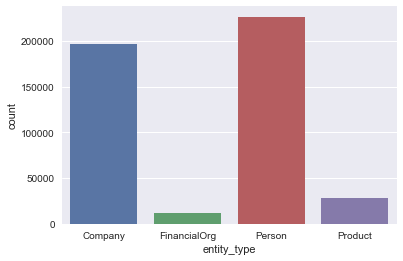

In [78]:
sns.countplot(x=final_obj["entity_type"]);

In [79]:
# top 10 names
top_10_names = final_obj['normalized_name'].value_counts().sort_values(ascending =False)[0:10]
top_10_names

bob hebig        40
david jones      22
mark johnson     18
david johnson    16
john lee         16
kevin smith      15
david lee        15
david smith      15
richard jones    14
michael smith    14
Name: normalized_name, dtype: int64

Observation:Person is the entity-type with highest frequency of 226708 followed by company and financial organization being the list

### Checking the status of the companies

In [80]:
final_obj["status"].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

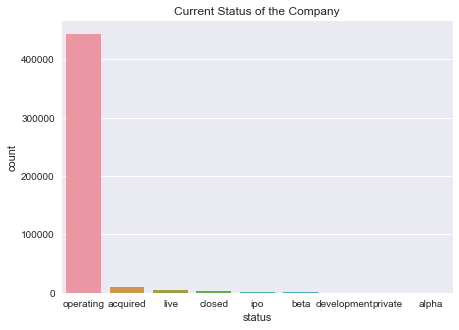

In [81]:
plt.figure(figsize=(7,5))
plt.title("Current Status of the Company")
sns.countplot(final_obj.status, order = final_obj.status.value_counts().index)
plt.show();

Observation: The above bar graph shows that most of the companies are in operating status.

In [82]:
# Total funding by status
company_status_distribution= final_obj.groupby('status')['funding_total_usd'].sum().sort_values(ascending =False)
company_status_distribution

status
operating      2.991990e+11
acquired       5.143894e+10
ipo            4.782311e+10
closed         1.453466e+10
private        0.000000e+00
live           0.000000e+00
development    0.000000e+00
beta           0.000000e+00
alpha          0.000000e+00
Name: funding_total_usd, dtype: float64

In [83]:
# Average funding by status
company_status_distribution= final_obj.groupby('status')['funding_total_usd'].mean().sort_values(ascending =False)
company_status_distribution

status
ipo            4.217205e+07
acquired       5.475722e+06
closed         5.241492e+06
operating      6.743835e+05
private        0.000000e+00
live           0.000000e+00
development    0.000000e+00
beta           0.000000e+00
alpha          0.000000e+00
Name: funding_total_usd, dtype: float64

Observation: The highest average funding is raised by IPO’s

In [84]:
final_obj[final_obj['status'] == 'ipo'][['normalized_name', 'category_code', 'funding_total_usd']].sort_values(by = 'funding_total_usd', ascending=False)[:10]

,normalized_name,category_code,funding_total_usd
160023,verizon communications,mobile,3.985050e+09
161551,facebook,social,2.425700e+09
2971,twitter,social,1.160167e+09
2225,groupon,web,1.147288e+09
181834,xerox,hardware,1.100000e+09
159845,sirius xm radio,public_relations,1.055750e+09
147367,aol,web,1.000000e+09
163774,blackberry,hardware,1.000000e+09
40111,zynga,games_video,8.602130e+08
174631,brightsource energy,cleantech,8.450000e+08


### Companies Services

In [85]:
final_obj['category_code'].value_counts()

software            17922
web                 15118
other               13617
ecommerce            9065
games_video          7520
mobile               6862
advertising          6098
consulting           5006
enterprise           4441
biotech              4430
hardware             2951
education            2901
public_relations     2846
network_hosting      2350
search               2182
cleantech            1940
health               1698
finance              1386
social               1310
security             1171
medical              1153
analytics            1022
legal                1012
travel                936
local                 785
news                  768
hospitality           768
semiconductor         696
manufacturing         680
sports                675
music                 581
fashion               563
photo_video           544
transportation        489
real_estate           474
messaging             296
automotive            291
design                281
nonprofit   

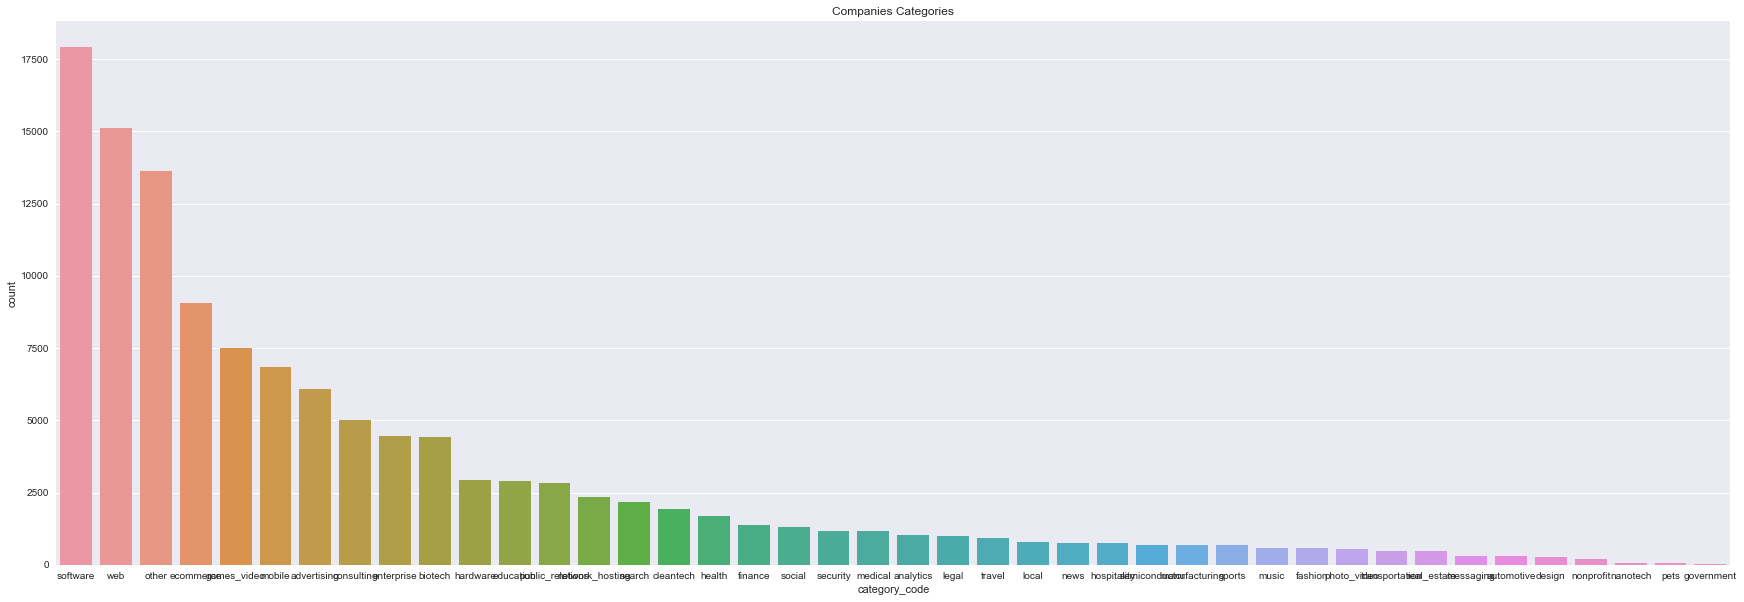

In [86]:
plt.figure(figsize=(30,10))
plt.title("Companies Categories")
sns.countplot(final_obj.category_code, order = final_obj.category_code.value_counts().index)
plt.show();

Observation: As we can see, most of the companies are software based, then web and mobile communication.

### Companies Milestone

In [87]:
final_obj['milestones'].unique()

array([5, 0, 4, 1, 3, 2, 6, 8, 7, 9], dtype=int64)

In [88]:
final_obj['milestones'].value_counts()

0    362293
1     83589
2     12503
3      3344
4       640
5       209
6        56
7        12
8         4
9         1
Name: milestones, dtype: int64

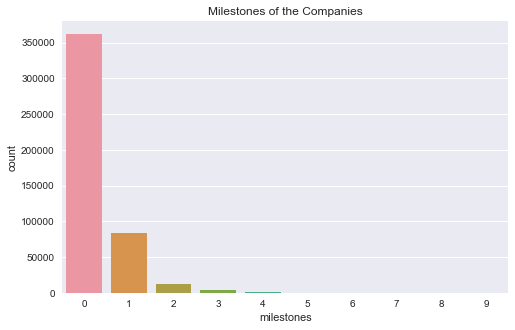

In [89]:
plt.figure(figsize=(8,5))
plt.title("Milestones of the Companies")
sns.countplot(final_obj.milestones)
plt.show();

Observation: The bar graph shows that most of the companies have achieved zero milestone, then one milestone and nine milestone being the least

### Industry

In [90]:
# total funding by industry
total_industry= final_obj.groupby('category_code')['funding_total_usd'].sum().sort_values(ascending =False)[0:10]
total_industry

category_code
biotech        6.686868e+10
software       4.176832e+10
cleantech      3.867019e+10
mobile         2.989867e+10
enterprise     2.134636e+10
web            1.891835e+10
ecommerce      1.762815e+10
hardware       1.496217e+10
games_video    1.472512e+10
medical        1.323517e+10
Name: funding_total_usd, dtype: float64

In [91]:
# Average funding by industry
name_of_industry= final_obj.groupby('category_code')['funding_total_usd'].mean().sort_values(ascending =False)[0:10]
name_of_industry

category_code
nanotech         3.086129e+07
cleantech        1.993309e+07
semiconductor    1.602228e+07
biotech          1.509451e+07
automotive       1.235127e+07
medical          1.147890e+07
manufacturing    8.722338e+06
messaging        6.850665e+06
analytics        6.554121e+06
security         6.079550e+06
Name: funding_total_usd, dtype: float64

### Office details

In [92]:
df_office.head()

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


In [93]:
# drop the column that is not needed
final_office = df_office.drop(['created_at', 'updated_at'], axis=1)

In [94]:
final_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112718 entries, 0 to 112717
Data columns (total 13 columns):
id              112718 non-null int64
object_id       112718 non-null object
office_id       112718 non-null int64
description     68530 non-null object
region          112718 non-null object
address1        94430 non-null object
address2        44520 non-null object
city            107550 non-null object
zip_code        93235 non-null object
state_code      62017 non-null object
country_code    112718 non-null object
latitude        112718 non-null float64
longitude       112718 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 11.2+ MB


In [95]:
final_office["region"].nunique()

6638

In [96]:
final_office["region"].value_counts()

SF Bay                   12274
New York                  7100
London                    5685
Los Angeles               4831
Boston                    3401
unknown                   2760
Washington DC             2191
Chicago                   2038
Seattle                   1887
San Diego                 1365
Paris                     1357
Atlanta                   1290
Dallas                    1236
Denver                    1193
Toronto                   1173
Austin                    1147
Philadelphia              1043
Bangalore                  810
Phoenix                    773
United States - Other      731
Berlin                     722
Houston                    710
Minneapolis                683
Vancouver                  662
New Delhi                  627
Miami                      620
Mumbai                     612
Salt Lake City             609
Singapore                  608
Portland                   607
                         ...  
Markyate                     1
Palo Ced

In [97]:
final_office['country_code'].nunique()

184

In [98]:
final_office['country_code'].value_counts()

USA    62991
GBR     9719
IND     5099
CAN     4574
DEU     2768
FRA     2285
AUS     2022
ESP     1482
ISR     1429
CHN     1375
IRL     1226
NLD     1124
SWE      938
ITA      899
SGP      866
BRA      819
JPN      773
CHE      762
FIN      679
RUS      647
HKG      532
BEL      492
DNK      484
ARG      437
TUR      422
POL      403
ZAF      387
ARE      334
NOR      331
AUT      312
       ...  
LBY        1
PCN        1
FJI        1
TLE        1
IRQ        1
HMI        1
NER        1
NFK        1
GLP        1
DZA        1
TJK        1
NCL        1
BWA        1
MCO        1
SUR        1
LSO        1
SDN        1
GRD        1
BFA        1
CXI        1
GIN        1
BEN        1
IOT        1
SYR        1
AIA        1
WSM        1
NRU        1
SOM        1
COG        1
MAC        1
Name: country_code, Length: 184, dtype: int64

### People details

In [99]:
df_people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [100]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 6 columns):
id                  226709 non-null int64
object_id           226709 non-null object
first_name          226704 non-null object
last_name           226708 non-null object
birthplace          28084 non-null object
affiliation_name    226691 non-null object
dtypes: int64(1), object(5)
memory usage: 10.4+ MB


In [101]:
df_people.duplicated().sum()

0

In [102]:
df_people['affiliation_name'].nunique()

27249

In [103]:
df_people['affiliation_name'].value_counts()

Unaffiliated                              183989
Google                                       244
Advent International                         178
Yahoo!                                       150
Microsoft                                    138
Robert W. Baird & Co.                         83
Knight Foundation                             72
Business Growth Fund                          64
TechCrunch                                    63
Facebook                                      61
MySpace                                       56
Comcast                                       56
Fort Washington Capital Partners Group        55
DuPont Capital Management                     54
Sands Capital Ventures                        51
Twitter                                       51
Amazon                                        48
Apple                                         47
Foresight Group                               39
eBay                                          39
AOL                 

### Relationship details

In [104]:
df_rel.head()

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


In [105]:
df_rel.shape

(402878, 11)

In [106]:
df_rel["sequence"].unique()

array([     8, 279242,      4, ..., 273026, 273047, 273049], dtype=int64)

In [107]:
df_rel["title"].nunique()

92339

In [108]:
df_rel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402878 entries, 0 to 402877
Data columns (total 11 columns):
id                        402878 non-null int64
relationship_id           402878 non-null int64
person_object_id          402878 non-null object
relationship_object_id    402878 non-null object
start_at                  206995 non-null object
end_at                    101046 non-null object
is_past                   402878 non-null int64
sequence                  402878 non-null int64
title                     389538 non-null object
created_at                402878 non-null object
updated_at                402878 non-null object
dtypes: int64(4), object(7)
memory usage: 33.8+ MB


In [109]:
# drop the column that is not needed
final_rel = df_rel.drop(['start_at',
       'end_at', 'created_at', 'updated_at'], axis=1)

In [110]:
final_rel.isnull().sum()

id                            0
relationship_id               0
person_object_id              0
relationship_object_id        0
is_past                       0
sequence                      0
title                     13340
dtype: int64

## Questions from the dataset

### 1. What is the largest investment in an African startup?

In [111]:
inves = final_obj.merge(df_country, on =["country_code"], how = "outer")
inves.head()

,object_id,entity_type,normalized_name,category_code,status,country_code,state_code,city,region_x,investment_rounds,...,id,name,phone_code,capital,currency,currency_name,region_y,subregion,latitude,longitude
0,c:1,Company,wetpaint,web,operating,USA,WA,Seattle,Seattle,0.0,...,233.0,United States,1,Washington,USD,United States dollar,Americas,Northern America,38.0,-97.0
1,c:10,Company,flektor,games_video,acquired,USA,CA,Culver City,Los Angeles,0.0,...,233.0,United States,1,Washington,USD,United States dollar,Americas,Northern America,38.0,-97.0
2,c:100,Company,there,games_video,acquired,USA,CA,San Mateo,SF Bay,0.0,...,233.0,United States,1,Washington,USD,United States dollar,Americas,Northern America,38.0,-97.0
3,c:10005,Company,thomas publishing,advertising,operating,USA,NY,New York,New York,0.0,...,233.0,United States,1,Washington,USD,United States dollar,Americas,Northern America,38.0,-97.0
4,c:10009,Company,dimension5 labs,advertising,operating,USA,NM,Santa Fe,Santa Fe,0.0,...,233.0,United States,1,Washington,USD,United States dollar,Americas,Northern America,38.0,-97.0


In [112]:
africa_region = inves[inves["region_y"]== 'Africa']
africa_region

,object_id,entity_type,normalized_name,category_code,status,country_code,state_code,city,region_x,investment_rounds,...,id,name,phone_code,capital,currency,currency_name,region_y,subregion,latitude,longitude
423192,c:10002,Company,synergie media,advertising,operating,MAR,NaN,Agadir,Agadir,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423193,c:142998,Company,marocdeal,advertising,operating,MAR,NaN,Rabat,Rabat,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423194,c:148778,Company,pananga sarl,other,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423195,c:151181,Company,mobiblanc,mobile,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423196,c:162822,Company,mazone group,ecommerce,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423197,c:163331,Company,hmall ma,ecommerce,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423198,c:185376,Company,mobiacube,software,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423199,c:192156,Company,vip only ma,ecommerce,operating,MAR,NaN,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423200,c:195147,Company,undeal ma,ecommerce,operating,MAR,ME,Casablanca,Casablanca,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000
423201,c:210886,Company,top desert,other,operating,MAR,NaN,Marrakech,unknown,0.0,...,149.0,Morocco,212,Rabat,MAD,Moroccan dirham,Africa,Northern Africa,32.000000,-5.000000


In [113]:
africa_region.groupby('category_code')["funding_total_usd"].sum().sort_values(ascending=False)[0:5]

category_code
hospitality    102000000.0
ecommerce       93741922.0
biotech         53991000.0
mobile          51058000.0
games_video     45720000.0
Name: funding_total_usd, dtype: float64

**Observation: Hospitality is the largest investment in African Startup**

### 2a. What university did the founder that has the most funding rounds attend

In [114]:
# joining two tables object and funding rounds
df = final_funding.merge(final_obj, on =["object_id"], how = "outer")
df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,city,region,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,milestones,relationships
0,1.0,1.0,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,San Francisco,SF Bay,0.0,0.0,2005-10-01,2011-07-12,4.0,4.500000e+07,8.0,57.0
1,85.0,85.0,c:4,2005-10-01,series-a,a,2800000.0,2800000.0,USD,0.0,...,San Francisco,SF Bay,0.0,0.0,2005-10-01,2011-07-12,4.0,4.500000e+07,8.0,57.0
2,3503.0,3503.0,c:4,2008-09-24,series-c+,c,28700000.0,28700000.0,USD,0.0,...,San Francisco,SF Bay,0.0,0.0,2005-10-01,2011-07-12,4.0,4.500000e+07,8.0,57.0
3,24136.0,24136.0,c:4,2011-07-12,series-c+,d,5000000.0,5000000.0,USD,0.0,...,San Francisco,SF Bay,0.0,0.0,2005-10-01,2011-07-12,4.0,4.500000e+07,8.0,57.0
4,2.0,2.0,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,Menlo Park,SF Bay,3.0,3.0,2004-09-01,2011-01-21,11.0,2.425700e+09,5.0,269.0


In [115]:
# joining df table with degree table
df1 = df.merge(final_degree, on =["id"], how = "outer")
df1.head()

,id,funding_round_id,object_id_x,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,last_funding_at,funding_rounds,funding_total_usd,milestones,relationships,object_id_y,degree_type,subject,institution,graduated_at
0,1.0,1.0,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,2011-07-12,4.0,4.500000e+07,8.0,57.0,p:6117,MBA,NaN,NaN,NaT
1,85.0,85.0,c:4,2005-10-01,series-a,a,2800000.0,2800000.0,USD,0.0,...,2011-07-12,4.0,4.500000e+07,8.0,57.0,p:7042,MBA,NaN,Harvard Business School,NaT
2,3503.0,3503.0,c:4,2008-09-24,series-c+,c,28700000.0,28700000.0,USD,0.0,...,2011-07-12,4.0,4.500000e+07,8.0,57.0,p:34677,BA,NaN,University of Oxford,1997-01-01
3,24136.0,24136.0,c:4,2011-07-12,series-c+,d,5000000.0,5000000.0,USD,0.0,...,2011-07-12,4.0,4.500000e+07,8.0,57.0,p:71252,"CTA, Accounting",NaN,University of Cape Town,1982-01-01
4,2.0,2.0,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,2011-01-21,11.0,2.425700e+09,5.0,269.0,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01


In [116]:
# to see all the column
df1.columns

Index(['id', 'funding_round_id', 'object_id_x', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'entity_type',
       'normalized_name', 'category_code', 'status', 'country_code',
       'state_code', 'city', 'region', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'object_id_y', 'degree_type', 'subject', 'institution', 'graduated_at'],
      dtype='object')

In [117]:
# check the institution with the highest count
df1['institution'].value_counts()

Stanford University                                    2990
Harvard Business School                                1899
Harvard University                                     1581
University of California, Berkeley                     1476
Cornell University                                     1042
Massachusetts Institute of Technology (MIT)             976
University of Pennsylvania                              964
University of Michigan                                  900
Yale University                                         729
Stanford University Graduate School of Business         728
Columbia University                                     724
Duke University                                         659
Princeton University                                    643
Tel Aviv University                                     623
Northwestern University                                 598
Carnegie Mellon University                              592
University of Chicago                   

In [118]:
df1.pivot_table(index="institution", values = "raised_amount_usd", aggfunc = "sum").sort_values(by = 'raised_amount_usd', ascending=False)[:5]

,raised_amount_usd
institution,
Stanford University,1.292925e+10
Massachusetts Institute of Technology (MIT),1.074914e+10
Harvard University,7.302930e+09
"University of California, Berkeley",6.696058e+09
Cornell University,6.411747e+09


**Observation: Founder with the most funding rounds attend Stanford University**

### 2b. How many founders attended the school in [a] and how many of them have an IPO

In [119]:
# number of founders in stanford university
df1['institution'].value_counts().sort_values(ascending =False)[0:1]

Stanford University    2990
Name: institution, dtype: int64

**Observation: Stanford university has a count of 2990 founders**

In [120]:
# create a new dataframe for just institution and their status
df2 = df1[["institution", 'status']]

In [121]:
# check the head of the new dataframe
df2.head()

,institution,status
0,NaN,acquired
1,Harvard Business School,acquired
2,University of Oxford,acquired
3,University of Cape Town,acquired
4,"Washington University, St. Louis",ipo


In [122]:
# check where all institutions is ipo
ip = df2.where(df2['status'] =='ipo')
ip

,institution,status
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,"Washington University, St. Louis",ipo
5,Boston University,ipo
6,University of Greenwich,ipo
7,Harvard University,ipo
8,Carnegie Mellon University,ipo
9,Hamilton College,ipo


In [123]:
# number of institution with ipo
ip['institution'].value_counts()[0:1]

Stanford University    38
Name: institution, dtype: int64

**Observation: Stanford University has an ipo of 38**

**Final Observation: 2990 founders attend Stanford University and 38 of them have an ipo**

### 3. Which Region has the most startups?

In [124]:
# number of region
Top_10_region = final_office["region"].value_counts().sort_values(ascending =False)[0:10]
Top_10_region

SF Bay           12274
New York          7100
London            5685
Los Angeles       4831
Boston            3401
unknown           2760
Washington DC     2191
Chicago           2038
Seattle           1887
San Diego         1365
Name: region, dtype: int64

**Observation: From the top 10 region SF Bay is observed to be the region with the most startups**

### 4. Which startup has the most funding round?

In [125]:
# startup with the most funding round
most_funding_round= final_obj.groupby('status')['funding_rounds'].sum().sort_values(ascending =False)
most_funding_round

status
operating      43580
acquired        4918
closed          2890
ipo             1238
private            0
live               0
development        0
beta               0
alpha              0
Name: funding_rounds, dtype: int64

**Observation: Operating is the startup with the most funding round**

In [126]:
# name of founder with the most funding rounds
final_obj[final_obj['status'] == 'operating'][['normalized_name', 'funding_rounds']].sort_values(by = 'funding_rounds', ascending=False)[:5]

,normalized_name,funding_rounds
28940,tyro payments,15
185938,mobivery,15
130591,aviir,14
168265,instamed,13
156863,rostima,12


**Observation: Tyro Payments is the founders name with the most funding round**